In [ ]:
import functools
import subprocess
import pandas as pd # type: ignore
import sys
import yfinance as yf # type: ignore
import concurrent.futures
import logging
from threading import Thread
from threading import RLock
import os 
import json
import path_signature
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore


In [3]:
tickers = pd.read_csv(r"C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Quant_Trading\tickers.csv", header=None)
tickers = tickers.values
print(tickers)
ts = yf.Ticker(tickers[0][0])
hist = ts.history(interval='1d', period='5y')
hist

[['AAAU']
 ['AAXJ']
 ['ACWI']
 ...
 ['ZXM']
 ['ZXM.B']
 ['ZZZD']]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2019-11-18 00:00:00-05:00,14.660000,14.710000,14.650000,14.690000,124600,0.0,0.0,0.0
2019-11-19 00:00:00-05:00,14.630000,14.710000,14.630000,14.680000,18000,0.0,0.0,0.0
2019-11-20 00:00:00-05:00,14.690000,14.720000,14.640000,14.700000,33300,0.0,0.0,0.0
2019-11-21 00:00:00-05:00,14.660000,14.660000,14.590000,14.610000,31500,0.0,0.0,0.0
2019-11-22 00:00:00-05:00,14.660000,14.660000,14.590000,14.590000,17200,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,25.980000,25.990000,25.809999,25.930000,1729700,0.0,0.0,0.0
2024-11-12 00:00:00-05:00,25.830000,25.870001,25.629999,25.709999,1721400,0.0,0.0,0.0
2024-11-13 00:00:00-05:00,25.830000,25.850000,25.440001,25.450001,2358000,0.0,0.0,0.0


In [4]:
lock = RLock()

yf.set_tz_cache_location(r"C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Quant Trading")

format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO,
                    datefmt="%H:%M:%S")
#need to make sure items are unique as race conditions are not handled  for multithreading
# keys: ticker name
# values: (info, history)
LE_HISTO = dict() 
def loadHistory(ticker: list, histo: dict, lock:RLock):
    with lock:
        ts = yf.Ticker(ticker[0])
        # get all stock info
        #info = ts.info
        # get historical market data
        hist = ts.history(interval="1d", period='5y')
        histo[ticker[0]] = hist ## to replace with struct
func = lambda x: loadHistory(x, LE_HISTO, lock)
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    #result = executor.map(functools.partial(loadHistory , tickers, LE_HISTO, lock))
    result = executor.map(func, tickers)

14:41:07: AGLB: No data found, symbol may be delisted
14:41:09: AHYG: No data found, symbol may be delisted
14:41:10: ATSX: No price data found, symbol may be delisted (period=5y)
14:41:10: AVFM: No price data found, symbol may be delisted (period=5y)
14:41:12: AZGIW: No data found, symbol may be delisted
14:41:13: BAS500: No data found, symbol may be delisted
14:41:15: BBCD: No data found, symbol may be delisted
14:41:17: BDEQ: No data found, symbol may be delisted
14:41:18: BEPR: No data found, symbol may be delisted
14:41:19: BEPR.U: No data found, symbol may be delisted
14:41:21: BESG: No data found, symbol may be delisted
14:41:21: BGU: Period '5y' is invalid, must be one of ['1d', '5d']
14:41:21: BGZ: No price data found, symbol may be delisted (period=5y)
14:41:23: BGRT: No data found, symbol may be delisted
14:41:23: BGHC: No price data found, symbol may be delisted (period=5y)
14:41:25: BGIF: No data found, symbol may be delisted
14:41:26: BKCL: No data found, symbol may be de

In [5]:
LE_HISTO

{'AAAU':                                 Open       High        Low      Close  \
 Date                                                                    
 2019-11-18 00:00:00-05:00  14.660000  14.710000  14.650000  14.690000   
 2019-11-19 00:00:00-05:00  14.630000  14.710000  14.630000  14.680000   
 2019-11-20 00:00:00-05:00  14.690000  14.720000  14.640000  14.700000   
 2019-11-21 00:00:00-05:00  14.660000  14.660000  14.590000  14.610000   
 2019-11-22 00:00:00-05:00  14.660000  14.660000  14.590000  14.590000   
 ...                              ...        ...        ...        ...   
 2024-11-11 00:00:00-05:00  25.980000  25.990000  25.809999  25.930000   
 2024-11-12 00:00:00-05:00  25.830000  25.870001  25.629999  25.709999   
 2024-11-13 00:00:00-05:00  25.830000  25.850000  25.440001  25.450001   
 2024-11-14 00:00:00-05:00  25.330000  25.469999  25.280001  25.379999   
 2024-11-15 00:00:00-05:00  25.440001  25.469999  25.299999  25.330000   
 
                            

In [6]:
filtered_Histo = dict()
for sym in LE_HISTO:
    if len(LE_HISTO[sym]) != 0:
        filtered_Histo[sym]= LE_HISTO[sym]
filtered_Histo

{'AAAU':                                 Open       High        Low      Close  \
 Date                                                                    
 2019-11-18 00:00:00-05:00  14.660000  14.710000  14.650000  14.690000   
 2019-11-19 00:00:00-05:00  14.630000  14.710000  14.630000  14.680000   
 2019-11-20 00:00:00-05:00  14.690000  14.720000  14.640000  14.700000   
 2019-11-21 00:00:00-05:00  14.660000  14.660000  14.590000  14.610000   
 2019-11-22 00:00:00-05:00  14.660000  14.660000  14.590000  14.590000   
 ...                              ...        ...        ...        ...   
 2024-11-11 00:00:00-05:00  25.980000  25.990000  25.809999  25.930000   
 2024-11-12 00:00:00-05:00  25.830000  25.870001  25.629999  25.709999   
 2024-11-13 00:00:00-05:00  25.830000  25.850000  25.440001  25.450001   
 2024-11-14 00:00:00-05:00  25.330000  25.469999  25.280001  25.379999   
 2024-11-15 00:00:00-05:00  25.440001  25.469999  25.299999  25.330000   
 
                            

In [7]:
#cols = ['Close']#['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
df_histo = pd.DataFrame()#columns=cols)
count = 0
for ticker in filtered_Histo:
    df_temp = pd.DataFrame(filtered_Histo[ticker])
    df_temp[ticker] = df_temp['Close']
    #df_temp = df_temp.filter(cols)
    df_histo = pd.concat([df_histo, df_temp[ticker]], axis=1)
    if (count == 6):
        break

In [8]:
df_histo.to_csv(r'C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Quant_Trading\master_price.csv')

In [10]:
df_histo = pd.read_csv(r'C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Quant_Trading\master_price.csv', index_col=0)

In [11]:
df_histo

,AAAU,AAXJ,ACWI,ACWX,AEPGX,AFK,AGG,AGQ,AGTHX,AIEQ,...,OEF,OIGYX,OIL,OILK,OILU,OMFL,ONEQ,OUSYX,PATAX,PAVE
2019-11-18 00:00:00-05:00,14.690000,64.236450,70.747955,42.132408,44.892269,16.980062,99.048523,29.129999,38.720295,26.250639,...,135.497498,36.586464,17.617599,97.830101,NaN,31.574423,32.232838,4.514728,9.805577,17.190321
2019-11-19 00:00:00-05:00,14.680000,64.565826,70.665771,42.097439,45.040077,16.963696,99.118866,29.500000,38.779297,26.403923,...,135.264084,36.552216,17.162600,95.224976,NaN,31.472477,32.323883,4.514728,9.815169,17.190321
2019-11-20 00:00:00-05:00,14.700000,64.071762,70.364372,41.861382,44.859421,17.012794,99.356316,29.549999,38.712921,26.423088,...,134.729172,36.406658,17.657101,98.025017,NaN,31.273434,32.121670,4.514728,9.834358,17.021986
2019-11-21 00:00:00-05:00,14.610000,63.879623,70.336967,41.817661,44.695190,17.012794,99.215607,29.389999,38.668663,26.250639,...,134.719437,36.278221,18.054199,100.454247,NaN,31.205469,32.121670,4.514728,9.834358,16.962572
2019-11-22 00:00:00-05:00,14.590000,63.861324,70.400894,41.878864,44.760883,17.012794,99.268379,28.980000,38.705547,26.279377,...,135.011230,36.372410,17.945000,99.622314,NaN,31.419077,32.168625,4.514728,9.834358,17.061594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-13 00:00:00-05:00,25.450001,73.849998,120.309998,53.480000,57.209999,15.690000,97.690002,37.500000,81.959999,40.625999,...,289.529999,36.160000,NaN,42.310001,36.349998,55.259998,75.870003,NaN,9.470000,44.759998
2024-11-14 00:00:00-05:00,25.379999,73.480003,119.750000,53.439999,57.150002,15.670000,97.650002,38.000000,81.230003,40.314999,...,287.720001,36.189999,NaN,42.529999,36.669998,54.790001,75.320000,NaN,9.490000,44.090000
2024-11-15 00:00:00-05:00,25.330000,73.440002,118.639999,53.349998,56.599998,15.660000,97.660004,37.340000,79.889999,39.936001,...,283.559998,35.750000,NaN,41.799999,36.139999,53.869999,73.629997,NaN,9.480000,43.810001
2024-11-16 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


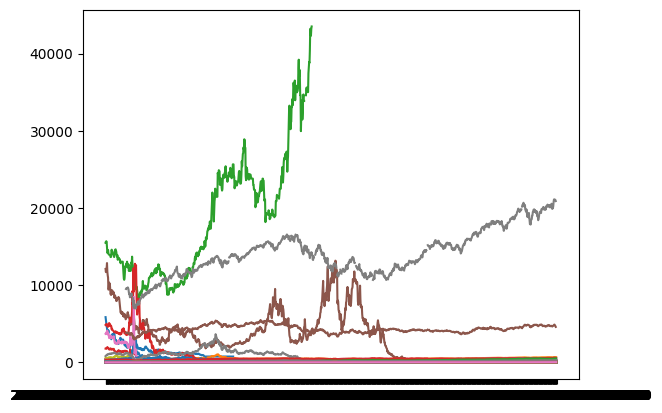

In [12]:
plt.plot(df_histo)
plt.show()

## Data Cleaning

### percent of data present
We first observe the percent prescence of our data (scope decreased to a daily observation versus hourly for better data quality and denoising). 

In [20]:
threshold = 0.95
clean_keys = []
n = len(df_histo)
#for i in df_histo.columns:
clean_pct = df_histo.isnull().sum(axis = 0)/n
clean_names = clean_pct[clean_pct < 1 - threshold].index ## names that are 70% clean 
df_clean = df_histo[clean_names]
df_clean

,AAAU,AAXJ,ACWI,ACWX,AEPGX,AFK,AGG,AGQ,AGTHX,AIEQ,...,NXTG,NYF,ODVYX,OEF,OIGYX,OILK,OMFL,ONEQ,PATAX,PAVE
2019-11-18 00:00:00-05:00,14.690000,64.236450,70.747955,42.132408,44.892269,16.980062,99.048523,29.129999,38.720295,26.250639,...,52.392155,55.084591,43.186775,135.497498,36.586464,97.830101,31.574423,32.232838,9.805577,17.190321
2019-11-19 00:00:00-05:00,14.680000,64.565826,70.665771,42.097439,45.040077,16.963696,99.118866,29.500000,38.779297,26.403923,...,52.480434,55.055550,43.313313,135.264084,36.552216,95.224976,31.472477,32.323883,9.815169,17.190321
2019-11-20 00:00:00-05:00,14.700000,64.071762,70.364372,41.861382,44.859421,17.012794,99.356316,29.549999,38.712921,26.423088,...,52.039009,55.229740,43.040779,134.729172,36.406658,98.025017,31.273434,32.121670,9.834358,17.021986
2019-11-21 00:00:00-05:00,14.610000,63.879623,70.336967,41.817661,44.695190,17.012794,99.215607,29.389999,38.668663,26.250639,...,51.685871,55.171673,42.914246,134.719437,36.278221,100.454247,31.205469,32.121670,9.834358,16.962572
2019-11-22 00:00:00-05:00,14.590000,63.861324,70.400894,41.878864,44.760883,17.012794,99.268379,28.980000,38.705547,26.279377,...,51.715302,55.258781,43.031044,135.011230,36.372410,99.622314,31.419077,32.168625,9.834358,17.061594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-13 00:00:00-05:00,25.450001,73.849998,120.309998,53.480000,57.209999,15.690000,97.690002,37.500000,81.959999,40.625999,...,84.269997,53.570000,38.990002,289.529999,36.160000,42.310001,55.259998,75.870003,9.470000,44.759998
2024-11-14 00:00:00-05:00,25.379999,73.480003,119.750000,53.439999,57.150002,15.670000,97.650002,38.000000,81.230003,40.314999,...,83.989998,53.580002,38.910000,287.720001,36.189999,42.529999,54.790001,75.320000,9.490000,44.090000
2024-11-15 00:00:00-05:00,25.330000,73.440002,118.639999,53.349998,56.599998,15.660000,97.660004,37.340000,79.889999,39.936001,...,83.209999,53.689999,38.730000,283.559998,35.750000,41.799999,53.869999,73.629997,9.480000,43.810001
2024-11-16 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
## we want names that still trade
#alive_names
alive_names = (~df_histo.iloc[-2,].isnull())
df_alive = df_histo[alive_names[alive_names==True].index].iloc[:-1,]
df_alive
#df_histo.iloc[-2,].isnull()

,DAPXX
2019-11-18 00:00:00-05:00,NaN
2019-11-19 00:00:00-05:00,NaN
2019-11-20 00:00:00-05:00,NaN
2019-11-21 00:00:00-05:00,NaN
2019-11-22 00:00:00-05:00,NaN
...,...
2024-11-12 00:00:00-05:00,1.0
2024-11-13 00:00:00-05:00,1.0
2024-11-14 00:00:00-05:00,1.0
2024-11-15 00:00:00-05:00,1.0


we want some interval which has a near 100% presence. Suppose we at least 100 names like this. We can try running this script to find it

In [22]:
# given window length and starting date, we want to find list of names that satisfy this
def findGoodNames(window, start_idx, df_hist)->list:
    snapshot = df_hist.iloc[start_idx:window+start_idx,]
    clean_pct = snapshot.isnull().sum(axis = 0)/len(snapshot)
    clean_names = clean_pct[clean_pct == 0].index ## names that are 100% clean 
    print(clean_names)
    return clean_names

windows = [756, 504, 252, 126]
good_win = 0
for win in windows:
    start_idx = 0
    while(len(findGoodNames(win, start_idx, df_alive))<200 and start_idx + win < len(df_alive)):
        start_idx += 1
    if (start_idx + win < len(df_alive)):
        good_win = win
        break
print("start idx: ", start_idx)
print("window: ", good_win)
        

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dt

In [15]:
len(findGoodNames(win, start_idx, df_alive))

Index([], dtype='object')


0

In [17]:
## we define our training set as the largest window of good looking values + that has data that exists today
train_names = findGoodNames(good_win, start_idx, df_alive)
train_set = df_alive[train_names].iloc[start_idx:good_win,]
## process it to observe log return 
train_set = np.log(train_set) - np.log(train_set.shift(1))
train_set= train_set[1:]
train_set

Index([], dtype='object')


""


In [28]:
## SAVE GOOD NAMES
pd.DataFrame(clean_names).to_csv(r'C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Quant_Trading\Histo\clean_names.csv', index=False)

# Cointegration

In [17]:
# python 3 program check if a matrix is
# singular or not.
global N
N = 809
 
# Function to get cofactor of mat[p][q] in temp[][].
# n is current dimension of mat[][]
def getCofactor(mat,temp,p,q,n):
    i = 0
    j = 0
     
    # Looping for each element of the matrix
    for row in range(n):
        for col in range(n):
             
            # Copying into temporary matrix only 
            # those element which are not in given 
            # row and column
            if (row != p and col != q):
                temp[i][j] = mat[row][col]
                j += 1
                 
                # Row is filled, so increase row
                # index and reset col index
                if (j == n - 1):
                    j = 0
                    i += 1
 
# Recursive function to check if mat[][] is
# singular or not. */
def isSingular(mat,n):
    D = 0 # Initialize result
     
    # Base case : if matrix contains single element
    if (n == 1):
        return mat[0][0]
         
    temp = [[0 for i in range(N + 1)] for i in range(N + 1)]# To store cofactors
     
    sign = 1 # To store sign multiplier
 
    # Iterate for each element of first row
    for f in range(n):
         
        # Getting Cofactor of mat[0][f]
        getCofactor(mat, temp, 0, f, n)
        D += sign * mat[0][f] * isSingular(temp, n - 1)
         
        # terms are to be added with alternate sign
        sign = -sign
    return D

In [19]:
import seaborn as sns
#sns.heatmap(train_set.corr())
correlated_pairs = []
corr_name_quarantine = []
corr_mat = train_set.corr()
for i in train_set.columns:
    for j in train_set.columns:
        if i == j:
            continue
        if abs(corr_mat.loc[i,j] - 1) < 0.01 or abs(corr_mat.loc[i,j] + 1) < 0.01:
            correlated_pairs.append([i,j])
            corr_name_quarantine.append(j)
print(correlated_pairs)

[['AAAU', 'BAR'], ['AAAU', 'GLD'], ['AAAU', 'GLDM'], ['AAAU', 'GLL'], ['AAAU', 'IAU'], ['AAAU', 'UGL'], ['ACWI', 'VT'], ['ACWX', 'IXUS'], ['ACWX', 'VEU'], ['ACWX', 'VSGX'], ['ACWX', 'VXUS'], ['AGQ', 'SIVR'], ['AGQ', 'SLV'], ['AGQ', 'ZSL'], ['ASHR', 'CHAU'], ['BAR', 'AAAU'], ['BAR', 'GLD'], ['BAR', 'GLDM'], ['BAR', 'IAU'], ['BAR', 'UGL'], ['BBEU', 'EPV'], ['BBEU', 'FEU'], ['BBEU', 'IEUR'], ['BBEU', 'IEV'], ['BBEU', 'VGK'], ['BBJP', 'EWJ'], ['BBJP', 'FLJP'], ['BRMKX', 'IWR'], ['BRMKX', 'SCHM'], ['BRMKX', 'VO'], ['BSPAX', 'ESGU'], ['BSPAX', 'ESGV'], ['BSPAX', 'FXAIX'], ['BSPAX', 'GSLC'], ['BSPAX', 'ITOT'], ['BSPAX', 'IVV'], ['BSPAX', 'IWB'], ['BSPAX', 'IWL'], ['BSPAX', 'IWV'], ['BSPAX', 'IYY'], ['BSPAX', 'MGC'], ['BSPAX', 'OEF'], ['BSPAX', 'SDS'], ['BSPAX', 'SH'], ['BSPAX', 'SPLG'], ['BSPAX', 'SPTM'], ['BSPAX', 'SPUU'], ['BSPAX', 'SPXL'], ['BSPAX', 'SPXS'], ['BSPAX', 'SPXU'], ['BSPAX', 'SPY'], ['BSPAX', 'SPYX'], ['BSPAX', 'SSO'], ['BSPAX', 'SUSA'], ['BSPAX', 'UPRO'], ['BSPAX', 'VFIAX'], [

In [20]:
print('How many unique correlated pairs we have: ', len(correlated_pairs))
#corr_name_quarantine

How many unique correlated pairs we have:  1340


In [21]:
### we remove the names which are highly correlated (numerically causing singular matrix issues) for a non-corr matrix analysis
unCorr_train = train_set[[x for x in train_set.columns if x not in corr_name_quarantine]]
unCorr_train

,AAXJ,AEPGX,AFK,AGG,AGTHX,AIEQ,AIMOX,AIQ,AMCFX,ANGIX,...,XNTK,XRT,XSMO,XSVM,XT,XYLD,XAR,YCS,YYY,ZROZ
2019-11-12 00:00:00-05:00,-0.004954,0.002756,0.000000,0.001072,0.004058,0.002604,0.000000,0.004146,0.003013,0.000000,...,0.003128,-0.001802,0.001853,0.001533,0.002451,0.000800,0.003804,-0.000786,-0.001129,0.008850
2019-11-13 00:00:00-05:00,-0.009553,-0.003307,-0.010172,0.001785,-0.002703,0.004818,0.000649,-0.001360,-0.001204,0.000000,...,-0.001433,-0.005198,-0.001324,-0.007071,0.000489,-0.000400,0.002438,-0.003678,0.002256,0.009587
2019-11-14 00:00:00-05:00,-0.001864,-0.001474,0.004372,0.002849,0.001932,0.000000,-0.002598,-0.003973,0.002707,0.000000,...,0.000000,0.006550,0.001588,0.001541,-0.001469,0.000800,0.006831,-0.006072,-0.001127,0.012640
2019-11-15 00:00:00-05:00,0.006153,0.006248,0.001453,-0.000534,0.011131,0.009932,0.006481,0.011520,0.011053,0.000904,...,0.009856,0.009857,0.005275,0.003690,0.009268,0.002794,0.008651,0.007124,0.001127,-0.001315
2019-11-18 00:00:00-05:00,0.001568,0.001465,0.004347,0.001867,0.001906,0.002924,0.003225,0.003225,-0.000594,0.000000,...,0.001805,-0.000892,0.001577,-0.002151,-0.000243,-0.000997,-0.002312,-0.003556,-0.001691,0.002629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03 00:00:00-04:00,0.006191,-0.006815,-0.013712,-0.003703,-0.007695,-0.008874,-0.006949,-0.017952,-0.010982,-0.001157,...,-0.014010,0.009068,0.000411,-0.004548,-0.008292,-0.004027,-0.000958,0.006588,-0.003439,-0.011651
2022-11-04 00:00:00-04:00,0.043984,0.031914,0.055001,-0.000106,0.012792,-0.004367,0.032925,0.009016,0.014389,0.001157,...,0.016132,-0.001807,0.015308,0.021049,0.015437,0.007788,0.012860,-0.022281,0.007722,-0.027768
2022-11-07 00:00:00-05:00,0.004714,0.008511,0.001865,-0.003185,0.006432,0.003277,0.004040,0.016235,0.007118,0.000000,...,0.010437,0.009491,0.015676,0.014978,0.001940,0.004245,0.020888,0.000298,0.002561,-0.018240
2022-11-08 00:00:00-05:00,0.008862,0.009069,0.012959,0.004245,0.005039,-0.004206,0.008032,0.010850,0.007067,0.000000,...,0.010433,0.002927,-0.001597,-0.000209,0.016656,0.000498,0.007388,-0.013667,0.012707,0.012939


<AxesSubplot: >

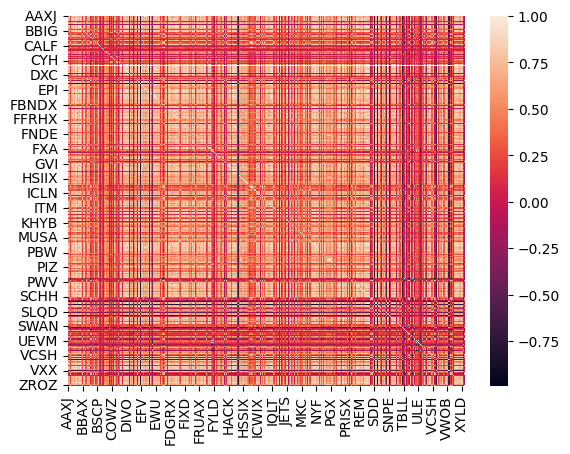

In [22]:
sns.heatmap(unCorr_train.corr())

In [43]:
## we run a variety of different cointegration tests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Perform the Johansen Cointegration Test with a specified number of zero
specified_number = 0  # Testing for zero cointegrating relationships
coint_test_result = coint_johansen(unCorr_train.iloc[:,:3], specified_number, 1)

# Extract the trace statistics and eigen statistics
trace_stats = coint_test_result.lr1
eigen_stats = coint_test_result.lr2

# Print the test results
print("Johansen Cointegration Test Results (Testing for Zero Cointegrating Relationships):")
print(f"Trace Statistics: {coint_test_result.lr1}")
print(f"Critical Values: {coint_test_result.cvt}")

# Define stock pairs
stock_pairs = [('AAPL', 'AMZN'), ('MSFT', 'AAPL'), ('AMZN', 'MSFT')]

# Separate the output sections
print("\n" + "-" * 50 + "\n")

# Interpret the results for each pair
for i, (stock1, stock2) in enumerate(stock_pairs):
    trace_statistic = trace_stats[i]
    eigen_statistic = eigen_stats[i]
    print(f"Pair {i + 1} ({stock1} and {stock2}):")
    print(f"Trace Statistic: {trace_statistic}")
    print(f"Eigen Statistic: {eigen_statistic}")
    print("\n" + "-" * 50 + "\n")

# Determine cointegration based on critical values or other criteria
# Add your cointegration assessment logic here
print("Cointegration Assessment: Testing for Zero Cointegrating Relationships (Null Hypothesis)\n")

Johansen Cointegration Test Results (Testing for Zero Cointegrating Relationships):
Trace Statistics: [1031.36141705  607.36237444  243.9007124 ]
Critical Values: [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

--------------------------------------------------

Pair 1 (AAPL and AMZN):
Trace Statistic: 1031.361417052599
Eigen Statistic: 423.99904261678864

--------------------------------------------------

Pair 2 (MSFT and AAPL):
Trace Statistic: 607.3623744358106
Eigen Statistic: 363.46166203991737

--------------------------------------------------

Pair 3 (AMZN and MSFT):
Trace Statistic: 243.90071239589318
Eigen Statistic: 243.90071239589318

--------------------------------------------------

Cointegration Assessment: Testing for Zero Cointegrating Relationships (Null Hypothesis)



In [45]:
## obesrving one example 
x1 = 'AAAU'
x2 = 'BAR'

sub_train = df_alive[train_names].iloc[start_idx:good_win,]
sub_train = sub_train[[x1, x2]]
sub_train

,AAAU,BAR
2019-07-01 00:00:00-04:00,13.810000,13.797000
2019-07-02 00:00:00-04:00,14.120000,14.085000
2019-07-03 00:00:00-04:00,14.140000,14.140000
2019-07-05 00:00:00-04:00,13.980000,13.970000
2019-07-08 00:00:00-04:00,13.900000,13.880000
...,...,...
2022-06-23 00:00:00-04:00,18.139999,18.110001
2022-06-24 00:00:00-04:00,18.120001,18.084999
2022-06-27 00:00:00-04:00,18.100000,18.059999
2022-06-28 00:00:00-04:00,18.080000,18.040001
